In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import scanpy as sc
import celloracle as co
from matplotlib import cm
from matplotlib.colors import Normalize, to_hex
from celloracle.applications import Oracle_development_module
from celloracle.applications import Gradient_calculator

co.__version__
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams["savefig.dpi"] = 300
os.chdir('/home/gaojie/workspace/Mida_collab/')

which: no R in (/home/gaojie/bin:/home/gaojie/.local/bin:/home/gaojie/bin:/opt/anaconda/envs/celloracle_env/bin:/opt/anaconda/condabin:/usr/share/Modules/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/home/gaojie/workspace/miniforge3/envs/glue/bin/bedtools:/home/gaojie/workspace/miniforge3/envs/glue/bin/bedtools)


In [2]:
co.__version__

'0.18.0'

### Calcualte Pseudoage Vector

In [3]:
oracle = co.load_hdf5("TF_perturbation/output/GW11.celltype_sample.celloracle.oracle")
pseudoage = pd.read_csv('sample_data/RNA_raw/pseudoage_folding.vRG.tsv',sep='\t')
oracle.adata = oracle.adata[oracle.adata.obs['celltype']=='vRG',:]
oracle.adata.obs['pseudoage'] = pseudoage.loc[oracle.adata.obs_names,'PC1'] ###adding pseudoage info
oracle.adata.obs.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,...,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes,sample,celltype,omic,celltype_sample,pseudoage
GW11_C_AAACCCAAGGTTGTTC-1,2923,7.980708,6199,8.732305,16.260687,24.084530,34.150669,51.234070,103,4.644391,...,9.469269,10,2.397895,0.161316,2923,Sulcus,vRG,RNA,vRG_Sulcus,-2.960026
GW11_C_AAACCCAAGTGTGTTC-1,2682,7.894691,4846,8.486115,14.403632,21.027652,30.148576,46.698308,19,2.995732,...,9.327280,10,2.397895,0.206356,2682,Sulcus,vRG,RNA,vRG_Sulcus,-2.891338
GW11_C_AAACCCAGTTTGAAAG-1,1188,7.080868,1739,7.461640,17.423807,26.049454,38.355377,60.437033,72,4.290459,...,2.127660,2,1.098612,0.115009,1188,Sulcus,vRG,RNA,vRG_Sulcus,-1.240965
GW11_C_AAACCCATCAGTGCGC-1,2757,7.922261,5289,8.573574,14.728682,22.140291,31.726224,48.780488,35,3.583519,...,11.816979,4,1.609438,0.075629,2757,Sulcus,vRG,RNA,vRG_Sulcus,-2.687873
GW11_C_AAACGAACATGTCAGT-1,3616,8.193400,7978,8.984568,15.505139,23.050890,32.088243,47.179744,38,3.663562,...,12.885435,4,1.609438,0.050138,3616,Sulcus,vRG,RNA,vRG_Sulcus,-2.445611


In [4]:
links = co.load_hdf5("TF_perturbation/output/links.GW11.celltype_sample.celloracle.links")
links.filter_links(p=0.001, weight="coef_abs", threshold_number=2000)
links.cluster = ['vRG_Adjacent',
                 'vRG_Distant',
                 'vRG_Sulcus']

In [5]:
# Calculate network scores.     
links.get_network_score()   

In [6]:
### convert pseudoage to colors
pseudoage_list = np.array(pseudoage.loc[oracle.adata.obs_names,'PC1'])
norm = Normalize(vmin=pseudoage_list.min(), vmax=pseudoage_list.max(), clip=True)
cmap = cm.get_cmap("RdYlBu_r") 
rgba_array = cmap(norm(pseudoage_list))
oracle.colorandum = rgba_array

In [7]:
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(alpha=20,
                              use_cluster_specific_TFdict=True)

  0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
oracle_raw = oracle

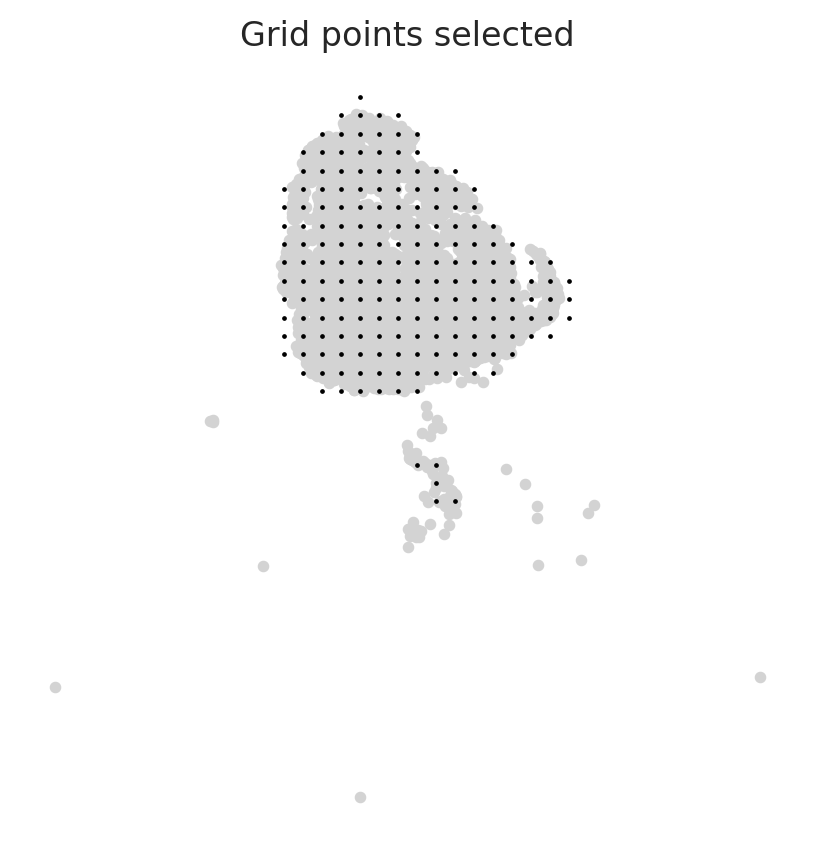

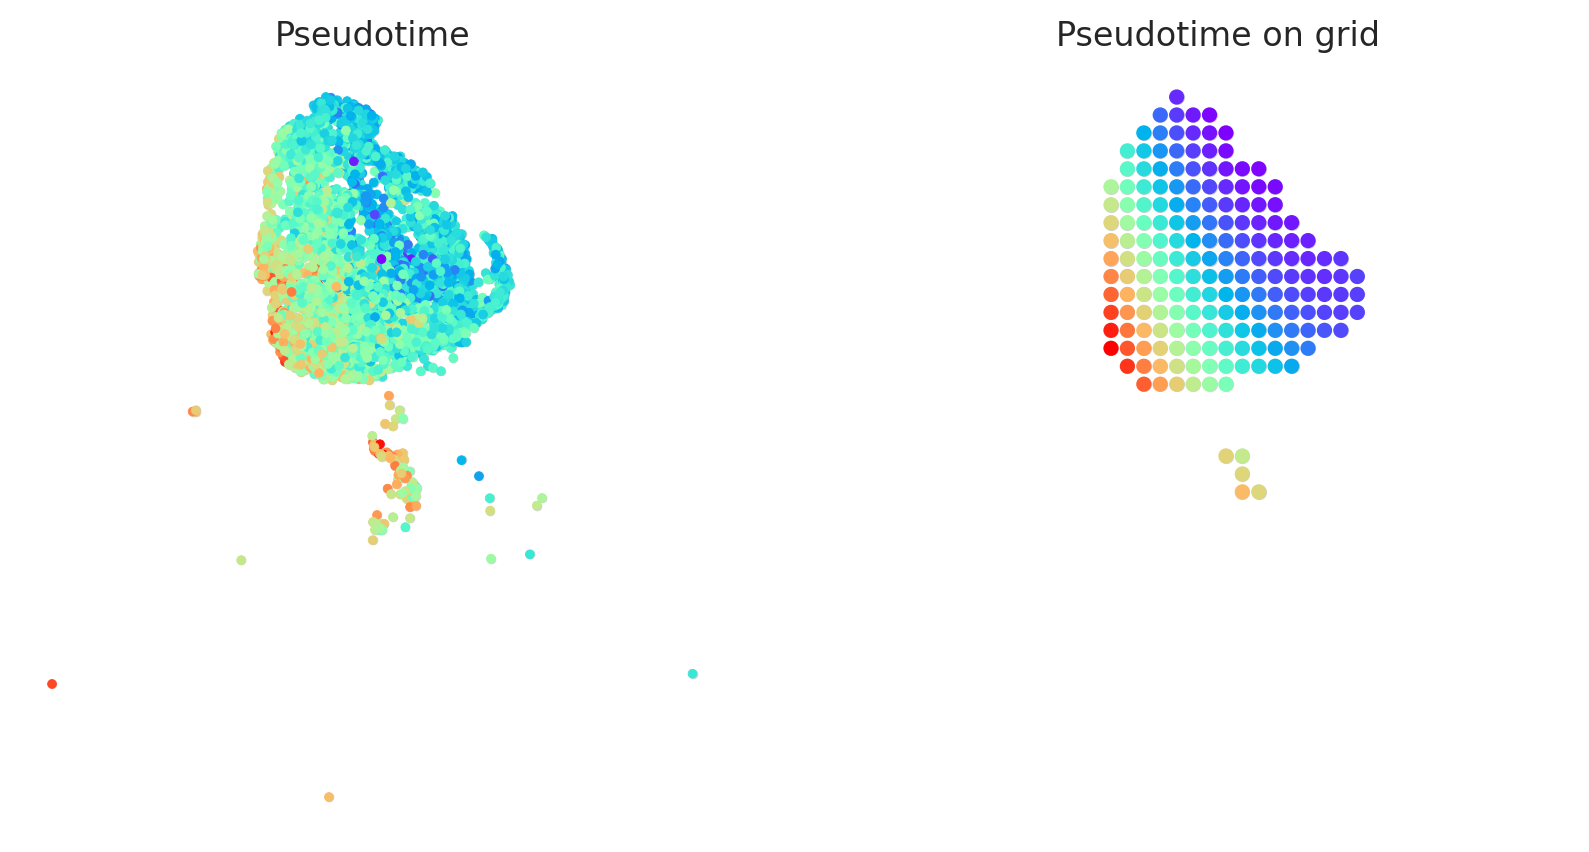

In [9]:
gradient = Gradient_calculator(oracle_object=oracle, pseudotime_key='pseudoage')
gradient.calculate_p_mass(smooth=0.8, n_grid=40, n_neighbors=200)
gradient.calculate_mass_filter(min_mass=18, plot=True)
gradient.transfer_data_into_grid(args={"method": "polynomial", "n_poly":3}, plot=True)
gradient.calculate_gradient()

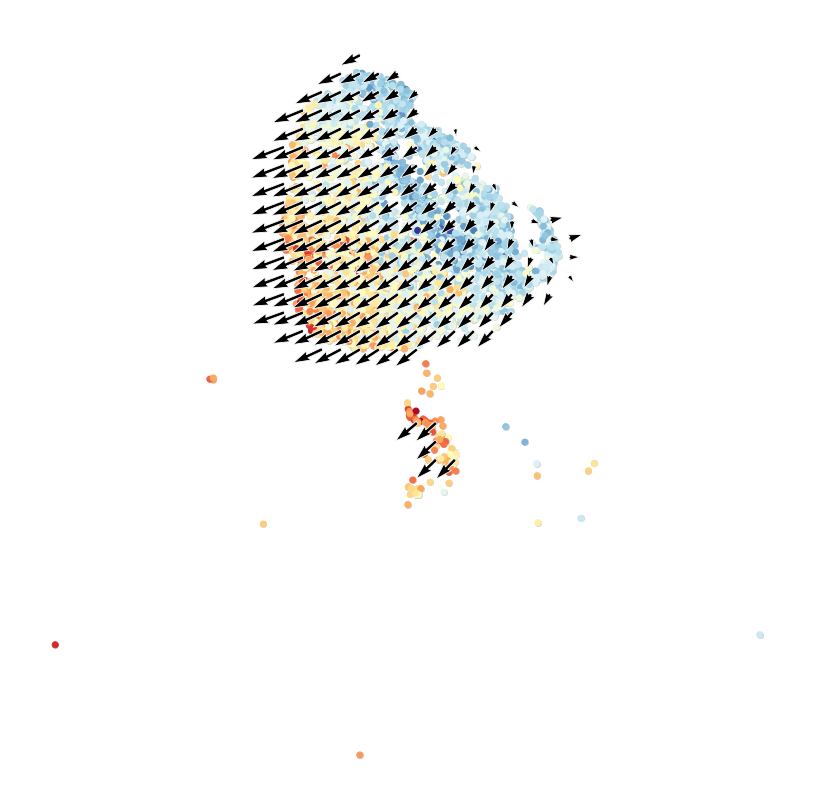

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
gradient.plot_pseudotime(ax,cmap = 'RdYlBu_r')
gradient.plot_reference_flow_on_grid(ax,scale=25,show_background=False,args={"lw": 0.3, "rasterized": True})

In [11]:
fig.savefig('TF_perturbation/output_celltype_sample/figures/Pseudoage_ref_grid.pdf')

### Volcano Plot

In [12]:
all_perturb = [i.split('.')[0] for i in os.listdir('TF_perturbation/Perturbation_Score/')]
all_TFs = pd.read_csv('CellOracle/output/GSEA_mat_bi_exp0.04pct0.05size20.csv',index_col=0).index.tolist()
intersect = [i for i in all_TFs if i in all_perturb]
len(intersect)

77

In [13]:
res_df = pd.DataFrame(columns = ['mean','pct_pos','pct_neg'])
for TF in intersect:
    tmp_df = pd.read_csv(f'TF_perturbation/Perturbation_Score/{TF}.csv',index_col=0)
    mean = tmp_df['score'].mean()   ###use the mean score to 
    percentage_pos = len(tmp_df[tmp_df['score']>0])/len(tmp_df)
    percentage_neg = len(tmp_df[tmp_df['score']<0])/len(tmp_df)
    res_df.loc[TF,['mean','pct_pos','pct_neg']] = [mean,percentage_pos,percentage_neg]

In [14]:
sum(res_df['mean']>=0)

34

In [15]:
res_df['max_pct'] = res_df.index.map(lambda x : max(res_df.loc[x,'pct_neg'],res_df.loc[x,'pct_pos']))

In [16]:
colors = []
for TF in res_df.index:
     ###use threshold of abs(mean) >= 0.05 and percentage >= 0.7
    if ((res_df.loc[TF,'mean'] >= -0.05) & (res_df.loc[TF,'mean'] <= 0.05)) | (res_df.loc[TF,'max_pct'] <= 0.7):
        colors.append('#808080')
    elif res_df.loc[TF,'max_pct'] == res_df.loc[TF,'pct_pos']:
        colors.append('#d92523ff')
    elif res_df.loc[TF,'max_pct'] == res_df.loc[TF,'pct_neg']:
        colors.append('#1e807aff') 
res_df['colors'] = colors  ###adding customized colors

In [17]:
res_df.head()

,mean,pct_pos,pct_neg,max_pct,colors
ARID3A,-0.011485,0.294118,0.705882,0.705882,#808080
ARX,0.007642,0.631016,0.368984,0.631016,#808080
ATF7,-0.019112,0.101604,0.898396,0.898396,#808080
BACH2,-0.02968,0.352941,0.647059,0.647059,#808080
CLOCK,-0.002828,0.481283,0.518717,0.518717,#808080


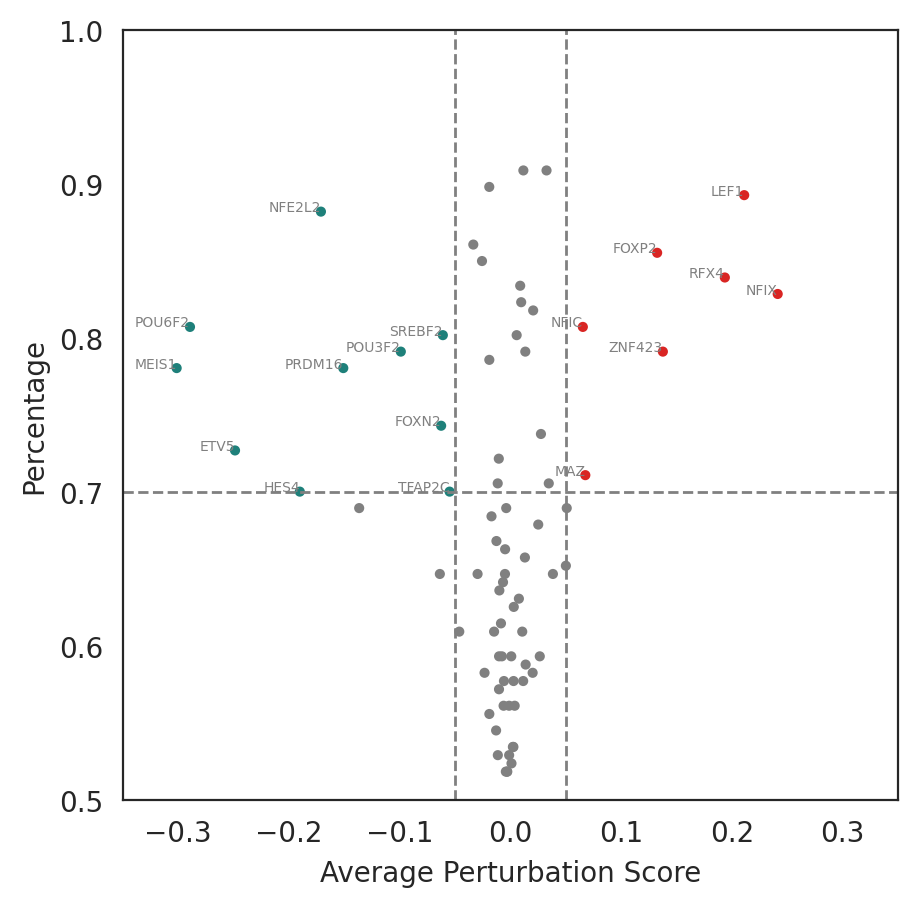

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(res_df['mean'], res_df['max_pct'], s = 7,c = res_df['colors'])

for i in res_df.index:
    if res_df.loc[i,'colors']!='#808080':
        ax.text(res_df.loc[i, 'mean'], res_df.loc[i,'max_pct'], i, fontsize=5, color='#808080', ha='right')
ax.axhline(y=0.7, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=0.05, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=-0.05, color='gray', linestyle='--', linewidth=1)

ax.set_xlim(-0.35,0.35)
ax.set_ylim(0.5,1)

ax.set_xticks(np.arange(-0.3,0.35,0.1))
ax.set_yticks(np.arange(0.5,1.05,0.1))

ax.set_xlabel('Average Perturbation Score')
ax.set_ylabel('Percentage')


plt.savefig('TF_perturbation/output_celltype_sample/Volcano_Perturbation_Score_Percentage.pdf')